In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
# Import the data from the json file
# Data is in format {},{},{},... and in a text file

# Read the data from the file
with open('../../Dataset/build_dataset.txt') as f:
    data = f.readlines()

# Convert the data to a list of dictionaries
data = [json.loads(x.strip()) for x in data]

In [3]:
# Function to create a histogram
def create_histogram(data, title, xlabel, ylabel='Number of Views', color='darkblue'):
    # Create a figure
    plt.figure(figsize=(10, 6))
    # Create a bar plot
    plt.bar(data.keys(), data.values(), color=color)
    # Add a title and axis labels
    plt.title(title)
    # Print x label
    plt.xlabel(xlabel)
    # Print y label
    plt.ylabel(ylabel)
    # Show the plot
    plt.show()

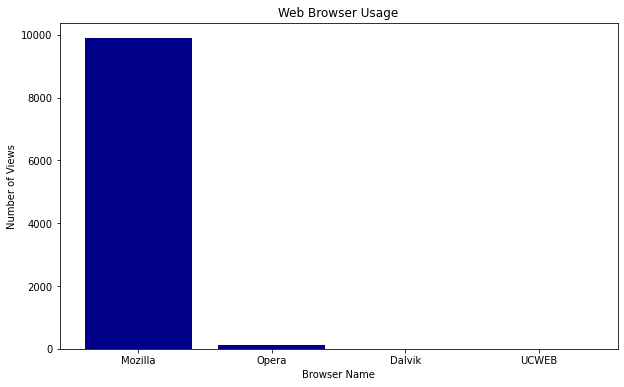

In [11]:
# Function to get the browser from the user agent
def get_browser():
    # Get the user agent from the data
    visitor_useragent = []
    for i in range(len(data)):
        visitor_useragent.append(data[i]['visitor_useragent'])
    
    # Get the browser from the user agent
    browser = []
    for i in range(len(visitor_useragent)):
        browser.append(visitor_useragent[i].split('/')[0])
        
    # Return the browser
    return browser

# Get browser counts
browser_counts = Counter(get_browser())
create_histogram(browser_counts, 'Web Browser Usage', 'Browser Name')